# Airbnb Data Pipeline: ETL, SQL and Analytics # 

Objective: Build an end-to-end data pipeline for Airbnb data (listings, calendar, reviews).

Skills: ETL, SQL schema design, Data Cleaning, Analytics, Visualization.

Tools: Python (Pandas, SQLite), Matplotlib, Seaborn.

In this project I build a data pipeline that extracts data from multiple files, transforms the data to further clean it, load it to SQL schema and perform some analytics to find meaningful results.

For the purpose of this project I have chosen the Airbnb dataset that includes 3 different files,
* calendar.csv
* listings.csv
* reviews.csv

# Stage 1 : Extract Data #


Importing all the required libraries

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
import sqlite3 # mimick database usage and analytics


*Real world scenario would have data coming in from various sources and types.*


For this use-case, the data is 3 different csv file formats. The data is loaded to separate dataframes using Pandas library.

In [140]:
#Reading the csv data to dataframes.
calendar_df = pd.read_csv("/kaggle/input/seattle/calendar.csv")
listings_df = pd.read_csv("/kaggle/input/seattle/listings.csv")
reviews_df = pd.read_csv("/kaggle/input/seattle/reviews.csv")

In [62]:
calendar_df.to_csv('calendar.csv', index=False)

Reviewing how the unprocessed data looks like.

In [63]:
#Viewing the first 10 rows of calendar.csv
calendar_df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [64]:
#Viewing the first 10 rows of listings.csv
listings_df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [65]:
#Viewing the first 10 rows of reviews.csv
reviews_df.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


Identifying basic information of the data

In [66]:
# Rows and columns of the dataframes
print("Shape of calendar df, Rows: ", calendar_df.shape[0] , " and Columns: ", calendar_df.shape[1])
print("Shape of listings df, Rows: ", listings_df.shape[0],  " and Columns: ", listings_df.shape[1])
print("Shape of reviews df, Rows: ", reviews_df.shape[0],  " and Columns: ", reviews_df.shape[1])

Shape of calendar df, Rows:  1393570  and Columns:  4
Shape of listings df, Rows:  3818  and Columns:  92
Shape of reviews df, Rows:  84849  and Columns:  6


In [67]:
# Information on the dataframe
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [68]:
# Information on the dataframe
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [69]:
# Information on the dataframe
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


We can see from the above detailed list of columns in each dataframe as well as their data types. It can also be deciphered that for listings.csv the column licence has all null values.

Checking for null values and duplicates in detail for each csv 

In [70]:
# Null values in calendar
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [71]:
#checking null values for available listings
calendar_available = calendar_df[calendar_df['available'] == "t"]
calendar_available.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [72]:
#duplicates in calendar_df
calendar_dup = calendar_df[calendar_df.duplicated()]
calendar_dup.count()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [73]:
# Null values in listings. Identifying how many columns have null values and null values in each column
listings_null = listings_df.columns[listings_df.isnull().any()].tolist()
print( "Number of columns with null values: ",len(listings_null))
columns = listings_df.isnull().sum()
columns[columns >0]


Number of columns with null values:  46


summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                   

In [74]:
#duplicates in listings_df
listings_dup = listings_df[listings_df.duplicated()]
listings_dup


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [75]:
# Null values in reviews
reviews_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [76]:
#duplicates in reviews_df
reviews_dup = reviews_df[reviews_df.duplicated()]
reviews_dup


,listing_id,id,date,reviewer_id,reviewer_name,comments


From the above results we can see that,
* calendar_df has null values for price column where the listing is unavailable or already booked.
* listings_df has null values in 46 columns with square_feet column having highest number of null values after license.
* reviews_df has null values for the comments column.


# Stage 2 : Transform Data #

*Cleaning the Calendar_df data*

Price column,
1. Removing '$' symbol
2. Removing commas
4. Convert the object data type to float
5. Replacing null values with 0 since prices are not missing for records with availability.

In [77]:
#Calendar data transformation
calendar_df['price'] = calendar_df['price'].str.replace('$','')
calendar_df['price'] = calendar_df['price'].str.replace(',','')
calendar_df['price'] = calendar_df['price'].astype('float')
calendar_df['price'] = calendar_df['price'].fillna(0)

Date column by formatting the column to datetime. Loading the cleansed data to new dataframe *"calendar"*

In [78]:
#Calendar data transformation
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar = calendar_df

*Cleaning the Listings_df data*

Impute the zipcode column

We can see from missing values that 7 rows are missing zipcode. The below code separates the rows with zipcode as null into 'data'. Using the apply() method on this dataframe, we find the zipcode by filtering on the already existing listing_df columns of 'neighbourhood_cleansed' and 'neighbourhood_group_cleansed' and extracting the first zipcode.

In [138]:
data = listings_df[listings_df['zipcode'].isnull()]
listings_df= listings_df.dropna(subset = 'zipcode')

def val(rows):
    value = listings_df[(listings_df['neighbourhood_cleansed'] == rows['neighbourhood_cleansed']) &  (listings_df['neighbourhood_group_cleansed'] == rows['neighbourhood_group_cleansed'])]
    zipcode = value['zipcode'].head(1).tolist()
    rows['zipcode'] = zipcode[0]
    return rows

data_df = data.apply(val, axis =1)
data_df[['street','neighbourhood_group_cleansed','neighbourhood_cleansed','zipcode']]


,street,neighbourhood_group_cleansed,neighbourhood_cleansed,zipcode


In [80]:
#concatinating those 7 records back to the original dataframe
listings_df = pd.concat([listings_df,data_df])

Transform price columns : cleaning_fee, security_deposit, price, monthly_price, weekly_price 
1. Removing '$' symbol
2. Removing commas
4. Convert the object data type to float
5. Imputing null values with mean for all prices and cleaning fee
6. Imputing null value in security_deposit with same value as price

In [81]:
#Listings data transformation
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace('$','')
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace(',','')

listings_df['security_deposit'] = listings_df['security_deposit'].str.replace('$','')
listings_df['security_deposit'] = listings_df['security_deposit'].str.replace(',','')

listings_df['price'] = listings_df['price'].str.replace('$','')
listings_df['price'] = listings_df['price'].str.replace(',','')

listings_df['monthly_price'] = listings_df['monthly_price'].str.replace('$','')
listings_df['monthly_price'] = listings_df['monthly_price'].str.replace(',','')

listings_df['weekly_price'] = listings_df['weekly_price'].str.replace('$','')
listings_df['weekly_price'] = listings_df['weekly_price'].str.replace(',','')

In [82]:
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].astype('float')
listings_df['security_deposit'] = listings_df['security_deposit'].astype('float')
listings_df['price'] = listings_df['price'].astype('float')
listings_df['monthly_price'] = listings_df['monthly_price'].astype('float')
listings_df['weekly_price'] = listings_df['weekly_price'].astype('float')

listings_df['cleaning_fee'] = listings_df['cleaning_fee'].fillna(listings_df['cleaning_fee'].mean())
listings_df['price'] = listings_df['price'].fillna(listings_df['price'].mean())
listings_df['monthly_price'] = listings_df['monthly_price'].fillna(listings_df['monthly_price'].mean())
listings_df['weekly_price'] = listings_df['weekly_price'].fillna(listings_df['weekly_price'].mean())
listings_df['security_deposit'] = listings_df['security_deposit'].fillna(listings_df['price'])


Filling null values with corresponding medians for bedrooms, bathrooms, beds and square_feet columns

In [83]:
#listings data transformation filling median values
listings_df.fillna({'bedrooms' : listings_df['bedrooms'].median() ,'bathrooms' : listings_df['bathrooms'].median(), 'beds' : listings_df['beds'].median(), 'square_feet' : listings_df['square_feet'].median()}, inplace=True)

last_scraped column by formatting the column to datetime

In [84]:
listings_df['last_scraped']= pd.to_datetime(listings_df['last_scraped'])

*Cleaning the Reviews_df data*

Date column by formatting the column to datetime and loading to new dataframe *reviews*

In [85]:
#Reviews data transformation
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews = reviews_df

# Feature Engineering : Some value added transformations #

The host_location column in most cases have a format city, state and country.To add a new column host_country, the below logic helps to separate them to only fetch the country. For entries that does not follow the format, the host_country column is imputed with the most frequently available data which is "United States" as shown below.

In [86]:
listings_df['host_location'].value_counts()

host_location
Seattle, Washington, United States         3259
US                                          246
Spokane, Washington, United States           41
Kent, Washington, United States              34
Los Angeles, California, United States       13
                                           ... 
Port Orchard, Washington, United States       1
Las Vegas, Nevada, United States              1
Bloomington, Indiana, United States           1
Houston, Texas, United States                 1
Arlington, Massachusetts, United States       1
Name: count, Length: 120, dtype: int64

In [87]:
#Imputing null values and extracting country
listings_df['host_location']=listings_df['host_location'].fillna('United States')

def exn(rows):
    value = rows.split(',')
    if len(value) == 3:
        return value[2]
    else:
        return "United States"

listings_df['host_country'] = listings_df['host_location'].apply(exn)
listings_df['host_country'] = listings_df['host_country'].str.replace(' ','')

Occupancy rate defined as the ratio of number of days the listings was booked to that of the the total number of days the listing was on the market thereby generating revenue. 

In [88]:
# Adding occupancy rate for listings.
calendar['occupancy_rate'] = (calendar[calendar['available'] == 'f'].groupby(['listing_id'])['available'].transform('count')) / calendar.groupby(['listing_id'])['available'].transform('count')
calendar['occupancy_rate'] = calendar['occupancy_rate'] * 100
calendar['occupancy_rate']= calendar['occupancy_rate'].fillna(0)

Here, added a new feature to identify superhosts by grouping hosts and counting the number of listings each hosts has. If the host has more than 10 listings, they are deemed as superhost.

In [89]:
# Super host 
listings_df['super_host'] = listings_df.groupby(['host_name'])['id'].transform('count').apply(lambda x : "Yes" if x >10 else 'No')


Now we have the transformed dataframes for calendar, listings and reviews dataframes. Further, extracting only desired columns from the listings dataframe and saving to a new dataframe *"listings"* to enhance the performance and optimiztion of the pipeline.

In [90]:
# Loading only desired columns and renaming for easy readability
listings = listings_df[['id','last_scraped','transit','host_name','host_location','property_type','room_type','bedrooms','bathrooms','beds','square_feet','price','weekly_price','monthly_price','minimum_nights','maximum_nights','neighbourhood_cleansed','host_country','super_host']]
listings= listings.rename(columns = {'host_name' : 'name', 'host_location' : 'location','neighbourhood_cleansed' : 'neighbourhood'})

host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2

# Stage 3: Load the data #

*In a real world scenario a data modelling phase would be needed after which the data would be loaded into a data warehouse. A sample schema for Airbnb dataset, with a more extensive use case application could look like below*

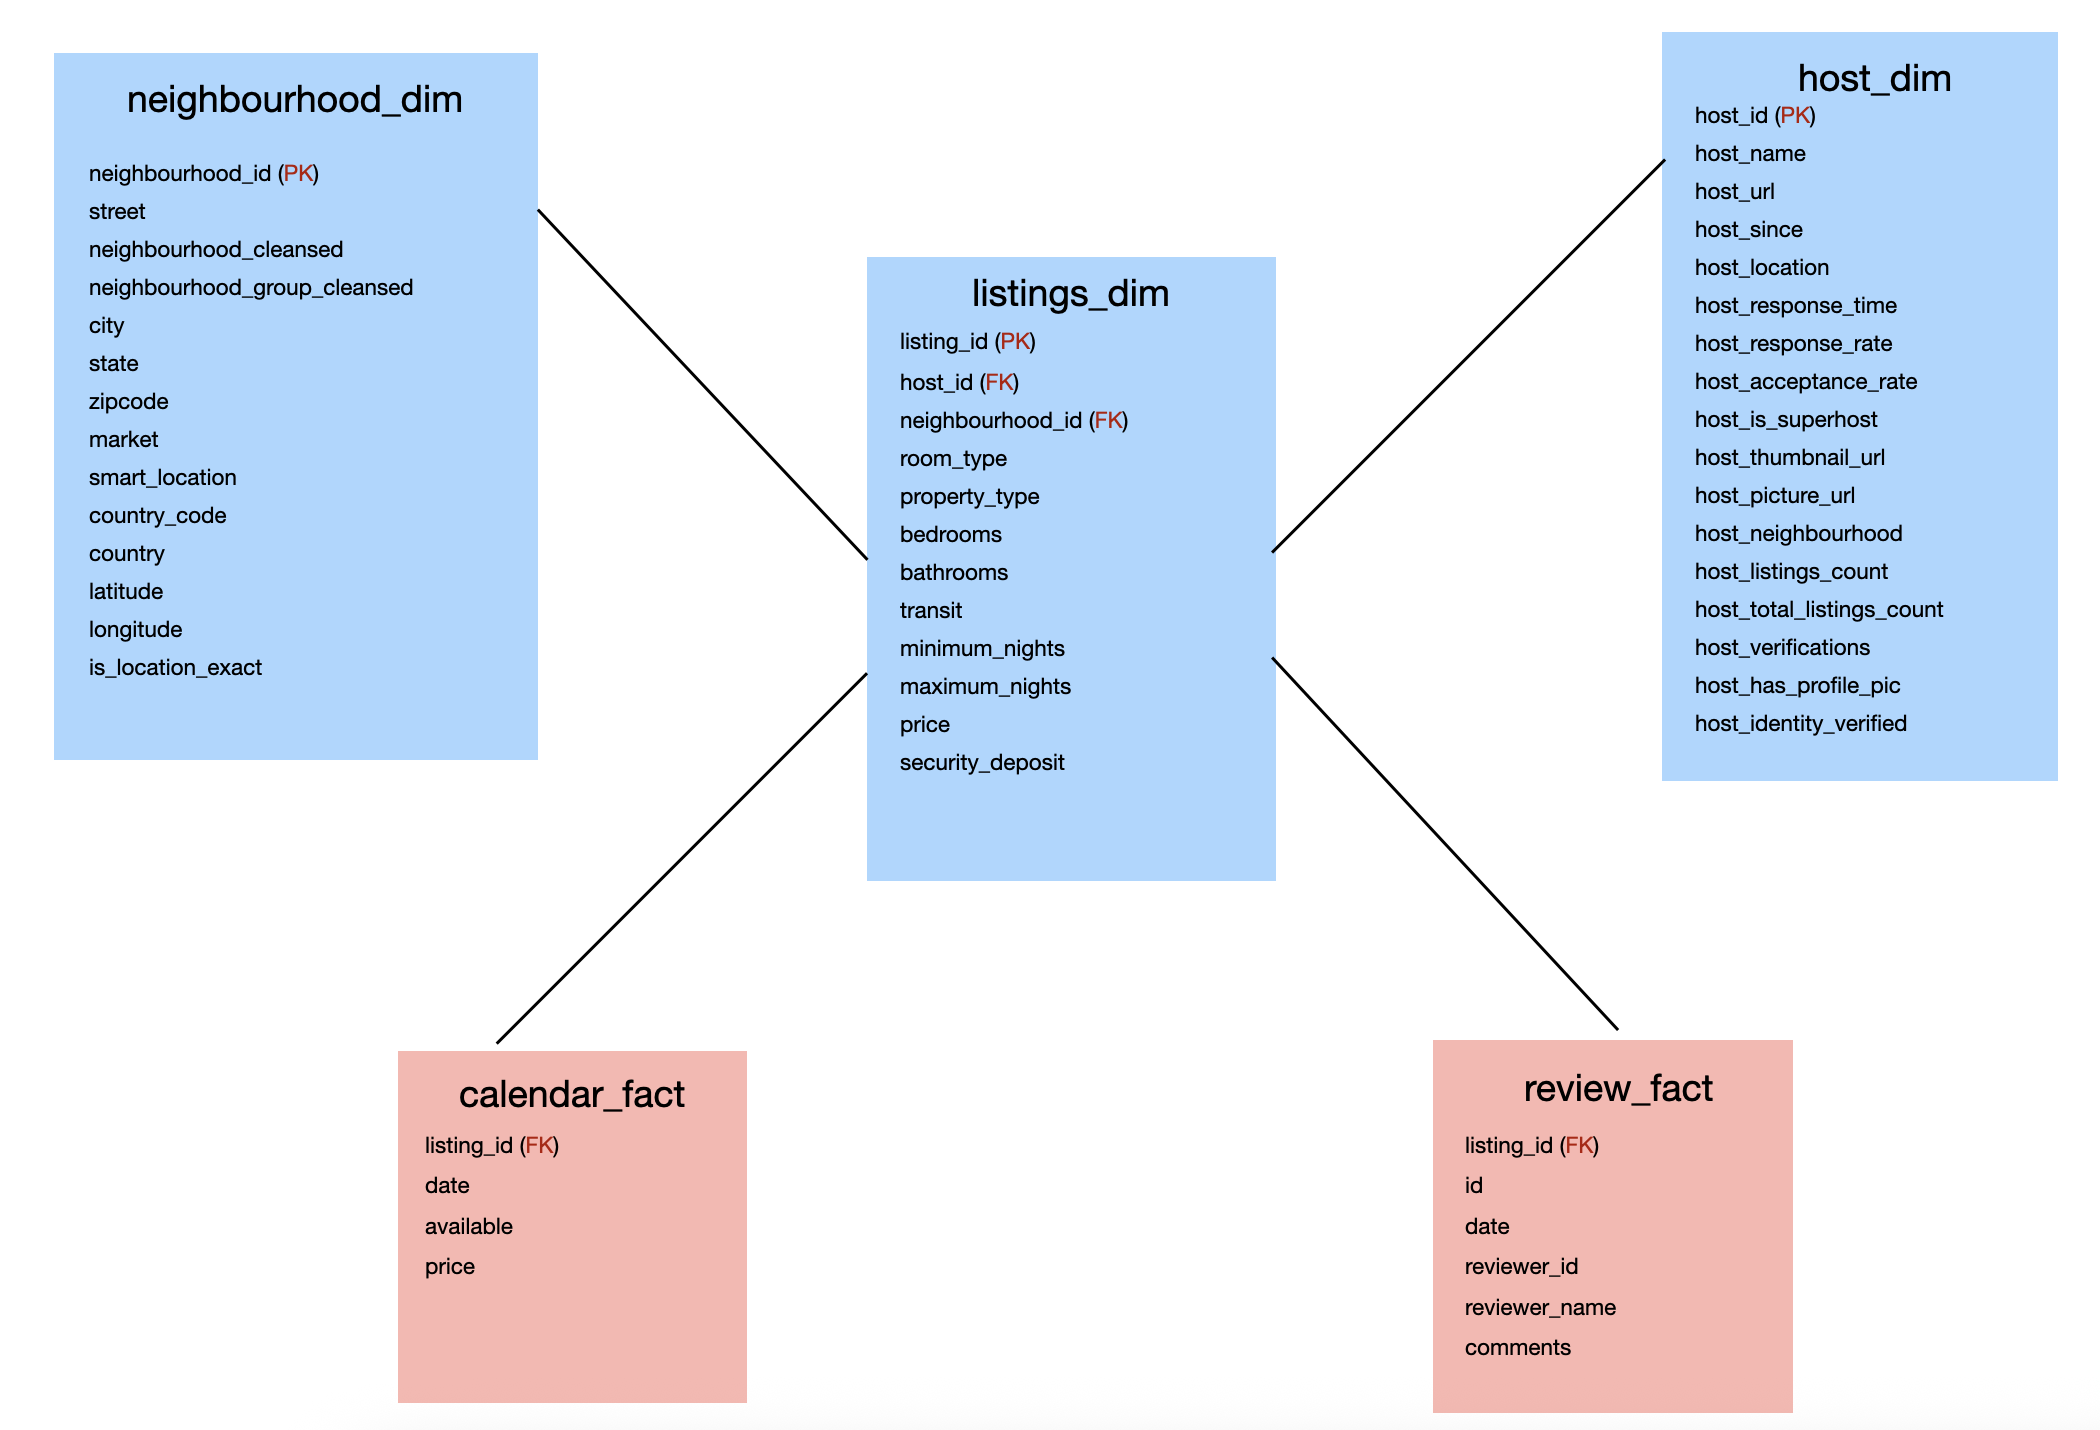

In the above diagram, there are 2 fact tables, calendar_fact and review_fact and 3 dimension tables that provide the context for the fact tables which are listings_dim, host_dim and neighbouhood_dim. The columns highlighted in red show the primary key, foreign key relationships between the table. In this use case, each listing can have multiple calendar entries as well as reviews from different people. Whereas each listing has one-to one relationship between the neighbourhood and host dimensions.

* calendar_fact = availability of listings with price
* review_fact = reviews by the users for the listings
* listing_dim = main dimension describing the listing
* host_dim = information on the hosts
* neighbourhood_dim = information on location/geography of the listings


The above schema has been designed with the star schema which will help to focus the datawarehouse design on
1. Speed of querying improved due to less seggregated tables
2. Easier to add new data to the table
3. Simple to understand and implement
4. Less number of tables hence easier to manage and maintain

For creating the neighbourhood_dim table, 
1. The desired columns from listings_df is copied to new dataframe
2. Duplicates are dropped based on keys'street','neighbourhood_cleansed','neighbourhood_group_cleansed' that can uniquely identify a neighbourhood record
3. Id column is added as surrogate key starting at index 1000

In [91]:
#neighbourhood_dim table
neighbourhood_dim = listings_df[['street','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','country_code','country','latitude','longitude','is_location_exact']].copy()
neighbourhood_dim =neighbourhood_dim.drop_duplicates(subset=['street','neighbourhood_cleansed','neighbourhood_group_cleansed'])
neighbourhood_index = np.arange(1000,len(neighbourhood_dim) + 1000).tolist()
neighbourhood_dim['neighbourhood_id'] = neighbourhood_index
neighbourhood_dim = neighbourhood_dim.rename(columns = {'neighbourhood_cleansed': 'neighbourhood' ,"neighbourhood_group_cleansed" : "neighbourhood_group"})
neighbourhood_dim.head(5)

,street,neighbourhood,neighbourhood_group,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,neighbourhood_id
0,"Gilman Dr W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,1000
1,"7th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,1001
2,"West Lee Street, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,1002
3,"8th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,t,1003
4,"14th Ave W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,t,1004


For creating the listings_dim table, 
1. The desired columns from listings_df is copied to new dataframe
2. Table is joined with neighbourhood_dim on keys 'street','neighbourhood_cleansed','neighbourhood_group_cleansed'
3. Neighbourhood_id column is extracted from the previous result


In [96]:
listings_table = listings_df[['id','host_id','street','neighbourhood_cleansed','neighbourhood_group_cleansed','room_type','property_type','bedrooms','bathrooms','transit','minimum_nights','maximum_nights','price','security_deposit']].copy()
listings_table = listings_table.merge(neighbourhood_dim, left_on =['street','neighbourhood_cleansed','neighbourhood_group_cleansed'], right_on =['street','neighbourhood','neighbourhood_group'], how = 'left' )
listings_dim = listings_table[['id','neighbourhood_id','host_id','room_type','property_type','bedrooms','bathrooms','transit','minimum_nights','maximum_nights','price','security_deposit']].copy()
listings_table.head(5)

,id,host_id,street,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,property_type,bedrooms,bathrooms,transit,...,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,neighbourhood_id
0,241032,956883,"Gilman Dr W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Entire home/apt,Apartment,1.0,1.0,NaN,...,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,1000
1,953595,5177328,"7th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Entire home/apt,Apartment,1.0,1.0,"Convenient bus stops are just down the block, ...",...,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,1001
2,3308979,16708587,"West Lee Street, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Entire home/apt,House,5.0,4.5,A bus stop is just 2 blocks away. Easy bus a...,...,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,1002
3,7421966,9851441,"8th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Entire home/apt,Apartment,0.0,1.0,NaN,...,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,t,1003
4,278830,1452570,"14th Ave W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Entire home/apt,House,3.0,2.0,The nearest public transit bus (D Line) is 2 b...,...,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,t,1004


For creating the host_dim table, 
1. The desired columns from listings_df is copied to new dataframe
2. Duplicates are dropped based on host_id if any
3. Any records with a null values in host_name is also dropped


In [97]:
#host_dim table
host_dim = listings_df[['host_id','host_name','host_url','host_since','host_location','host_country','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified']].copy()
host_dim = host_dim.drop_duplicates(['host_id'])
host_dim = host_dim.dropna(subset = ['host_name'])
host_dim.head(5)

,host_id,host_name,host_url,host_since,host_location,host_country,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,956883,Maija,https://www.airbnb.com/users/show/956883,2011-08-11,"Seattle, Washington, United States",UnitedStates,within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t
1,5177328,Andrea,https://www.airbnb.com/users/show/5177328,2013-02-21,"Seattle, Washington, United States",UnitedStates,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t
2,16708587,Jill,https://www.airbnb.com/users/show/16708587,2014-06-12,"Seattle, Washington, United States",UnitedStates,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t
3,9851441,Emily,https://www.airbnb.com/users/show/9851441,2013-11-06,"Seattle, Washington, United States",UnitedStates,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t
4,1452570,Emily,https://www.airbnb.com/users/show/1452570,2011-11-29,"Seattle, Washington, United States",UnitedStates,within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t


After completing all the desired transformation, I have loaded the data to be consumed from SQLite(to mimic a warehouse). The data loaded is consistent with the transformed dataset above and the insights to be uncovered. 

In [98]:
#loading data to sqlite
database_airbnb = sqlite3.connect("airbnb.db")
calendar.to_sql("calendar", database_airbnb, if_exists="replace", index=False)
listings_dim.to_sql("listings", database_airbnb, if_exists="replace", index=False)
reviews.to_sql("reviews", database_airbnb, if_exists="replace", index=False)
host_dim.to_sql("host", database_airbnb, if_exists="replace", index=False)
neighbourhood_dim.to_sql("neighbourhood", database_airbnb, if_exists="replace", index=False)


1846

# Exploratory analytics (SQL and Visualization) #

In [99]:
#hosts with most reviews 
query = "select h.host_name,count(r.listing_id) as number_of_reviews \
from reviews r left join listings l on l.id = r.listing_id left join host h on \
l.host_id = h.host_id group by h.host_name \
order by number_of_reviews desc limit 10"
result = pd.read_sql(query, database_airbnb)
result

,host_name,number_of_reviews
0,Michael,1339
1,Dirk & Jaq,1094
2,Daniela,1080
3,Nick,975
4,Chris,777
5,Lisa,721
6,Amy,702
7,Jordan,686
8,Lauren,654
9,David,653


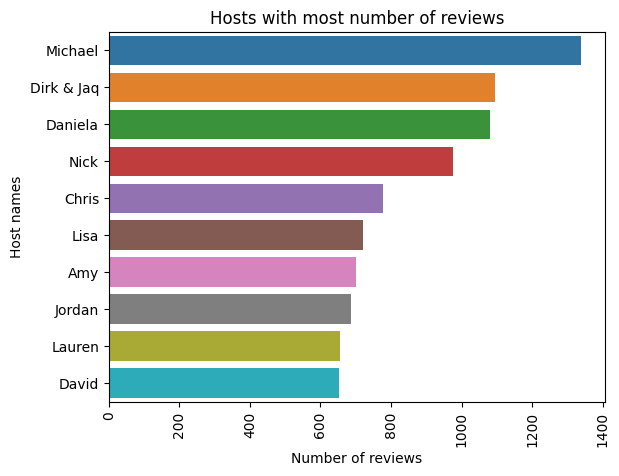

In [100]:
sns.barplot(data = result, y = 'host_name', x = 'number_of_reviews', orient = 'h')
plt.xticks(rotation = 90)
plt.title("Hosts with most number of reviews")
plt.xlabel("Number of reviews")
plt.ylabel("Host names")
plt.show()

The graph shows that there is a significant change in the number of reviews after the top 4 hosts, dropping by almost 50%

In [101]:
# top 10 most expensive and cheapest neighbourhoods
query_expensive = "select n.neighbourhood, avg(price) as price from listings l left join \
neighbourhood n on l.neighbourhood_id = n.neighbourhood_id \
group by neighbourhood order by price desc limit 10 "
result_expensive = pd.read_sql(query_expensive, database_airbnb)

query_cheaper = "select  n.neighbourhood, avg(price) as price from listings l left join \
neighbourhood n on l.neighbourhood_id = n.neighbourhood_id \
group by neighbourhood order by price asc limit 10 "
result_cheaper = pd.read_sql(query_cheaper, database_airbnb)
result = pd.concat([result_expensive,result_cheaper], ignore_index = True)
result

,neighbourhood,price
0,Southeast Magnolia,231.705882
1,Portage Bay,227.857143
2,Westlake,194.470588
3,West Queen Anne,187.769231
4,Montlake,182.789474
5,Briarcliff,176.571429
6,Sunset Hill,176.055556
7,Industrial District,173.333333
8,Alki,171.619048
9,Windermere,169.900000


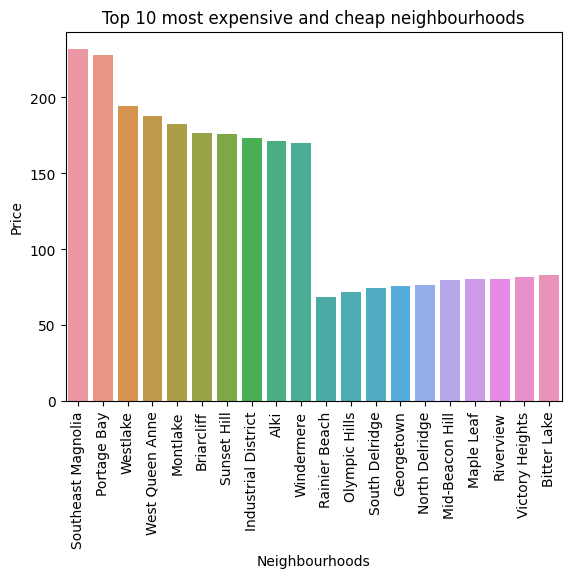

In [102]:
sns.barplot(data = result, x = "neighbourhood", y = "price")
plt.xticks(rotation = 90)
plt.title("Top 10 most expensive and cheap neighbourhoods")
plt.xlabel("Neighbourhoods")
plt.ylabel("Price")
plt.show()

The chart above depicts the top 10 and bottom 10 costliest neighbourhoods in the dataset. There is a significant shift in the price amongst the highest and lowest neighbourhoods showing vast dynamic distribution.

In [103]:
#occupancy trend analysis
query = "select strftime('%m',date) as month, sum(case when available ='f' then 1 else 0 end ) \
as occupancy from calendar group by month"
result = pd.read_sql(query, database_airbnb)
result

,month,occupancy
0,01,49603
1,02,37401
2,03,34420
3,04,38503
4,05,38387
5,06,37296
6,07,44136
7,08,42011
8,09,37294
9,10,35920


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


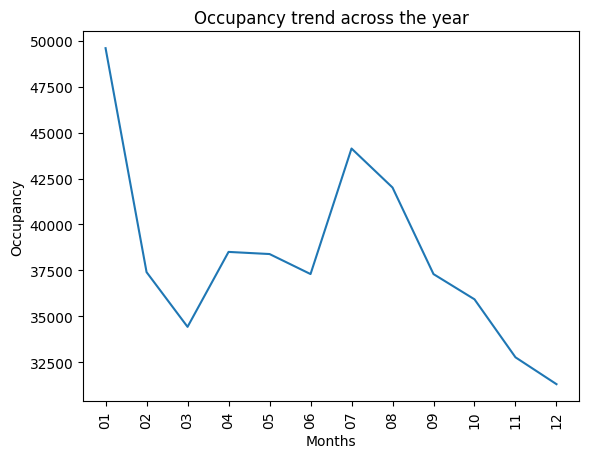

In [104]:
sns.lineplot(data = result, x = 'month', y = 'occupancy')
plt.xticks(rotation = 90)
plt.title("Occupancy trend across the year")
plt.xlabel("Months")
plt.ylabel("Occupancy")
plt.show()

Here we can see that there are seasonal spikes around the summer-holidays season, depicting potential for seasonal pricing.

In [105]:
#average price of room types
query = "select avg(price) as price, room_type from listings group by room_type"
result = pd.read_sql(query, database_airbnb)
result

,price,room_type
0,155.843369,Entire home/apt
1,75.044828,Private room
2,47.547009,Shared room


Text(0, 0.5, 'Price')

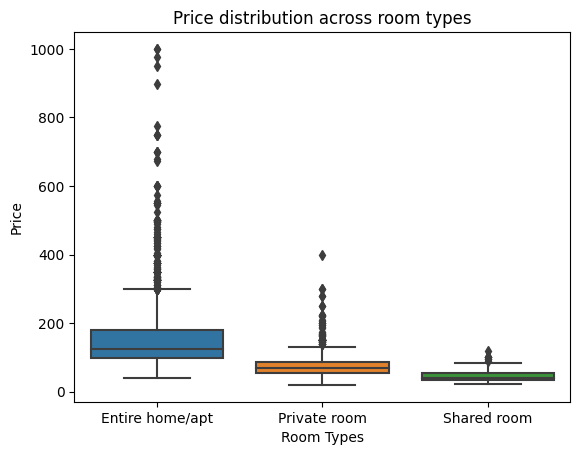

In [106]:
sns.boxplot(data = listings, x = 'room_type', y = 'price')
plt.title("Price distribution across room types")
plt.xlabel("Room Types")
plt.ylabel("Price")

We can see that Entire home/apt has the most earning potentials with the average being more than that of Private rooms and Shared room. There are also a significant price variation for houses depicting a dynamic pricing capability for such homes.

In [107]:
#listings with most reviews
query = "select l.id, l.price, count(r.reviewer_id) as reviews from listings l left join reviews r \
on l.id = r.listing_id group by l.id order by reviews desc"
result = pd.read_sql(query, database_airbnb)
result

,id,price,reviews
0,208356,89.0,474
1,365550,89.0,466
2,25002,75.0,404
3,47196,65.0,353
4,63308,89.0,320
...,...,...,...
3813,170469,60.0,0
3814,149489,50.0,0
3815,68508,225.0,0
3816,37234,99.0,0


Text(0, 0.5, 'Price')

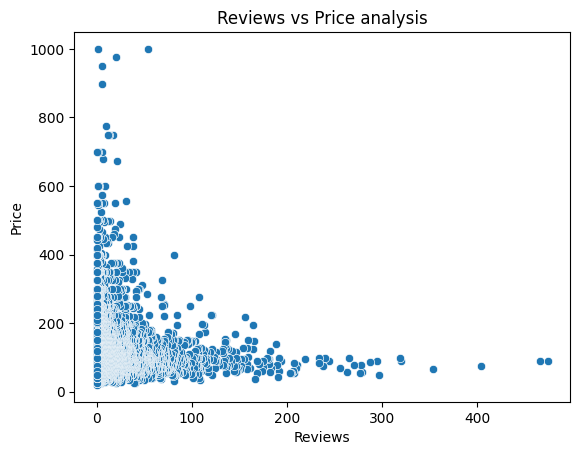

In [108]:
sns.scatterplot(data = result, x = 'reviews', y = 'price')
plt.title("Reviews vs Price analysis")
plt.xlabel("Reviews")
plt.ylabel("Price")


Here we can see that although listing id '208356' has the maximum reviews, the price of the listing is on the lower end of the pricing. Looking at the graph we can further understand that more reviews does not dictate higher prices

In [128]:
#host country location
query = "select host_country, count(host_id) as Total_number_of_hosts from \
host group by host_country"
result = pd.read_sql(query, database_airbnb)
result

,host_country,Total_number_of_hosts
0,Australia,1
1,Canada,3
2,China,1
3,England,1
4,Ghana,1
5,Italy,1
6,Mexico,1
7,UnitedStates,2738
8,WA,2


Most of the hosts are located in the United States with very few from other parts of the world.

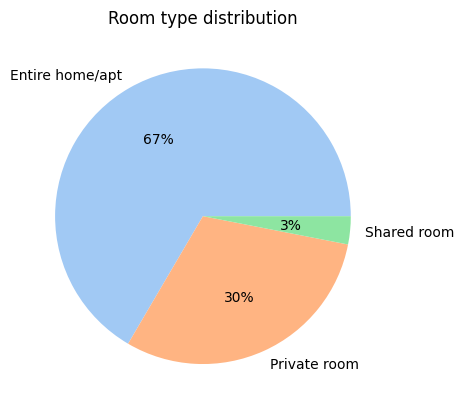

In [110]:
#room type distribution across dataset
query = "select count(id) as count, room_type from listings group by room_type"
result = pd.read_sql(query, database_airbnb)
colors = sns.color_palette('pastel')
plt.pie(result['count'], labels = result["room_type"], colors = colors, autopct='%.0f%%')
plt.title("Room type distribution")
plt.show()



The pie chart depicts that for this dataset majority of the listings are Entire homes followed by Private rooms.

<Axes: xlabel='minimum_nights', ylabel='id'>

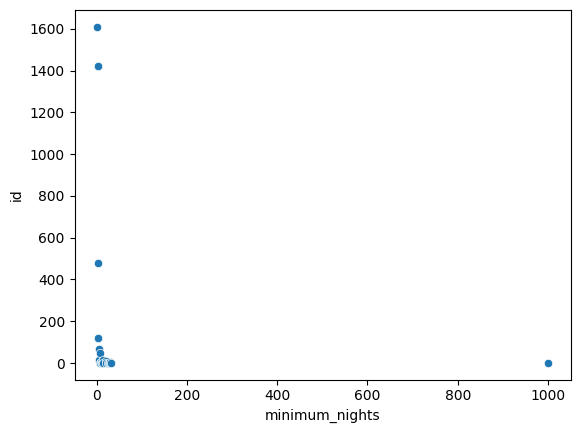

In [111]:
#Minimum nights for listings
df = pd.DataFrame(listings.groupby(['minimum_nights'])['id'].count())
sns.scatterplot(data = df, x = 'minimum_nights', y = 'id')

In [112]:
listings[listings.minimum_nights == 1000]

,id,last_scraped,transit,name,location,property_type,room_type,bedrooms,bathrooms,beds,square_feet,price,weekly_price,monthly_price,minimum_nights,maximum_nights,neighbourhood,host_country,super_host
2617,3594885,2016-01-04,NaN,Matan,US,Apartment,Entire home/apt,1.0,1.0,1.0,750.0,150.0,788.481832,2613.33619,1000,1125,Broadway,UnitedStates,No


The scatterplot shows that most listings have reasonable value for minimum nights booking. But, it is also shown that there is 1 listing that has a value of 1000, which is a possible outlier. On checking we can see the details of this listing as shown above

In [113]:
#Pricing changes over year
query = "select avg(price) as price, strftime('%m',date) as month from calendar group by month"
result = pd.read_sql(query, database_airbnb)
result

,price,month
0,69.683499,01
1,82.308439,02
2,91.233047,03
3,89.683700,04
4,94.281823,05
5,99.453597,06
6,95.377854,07
7,97.181255,08
8,96.612092,09
9,95.444659,10


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Price')

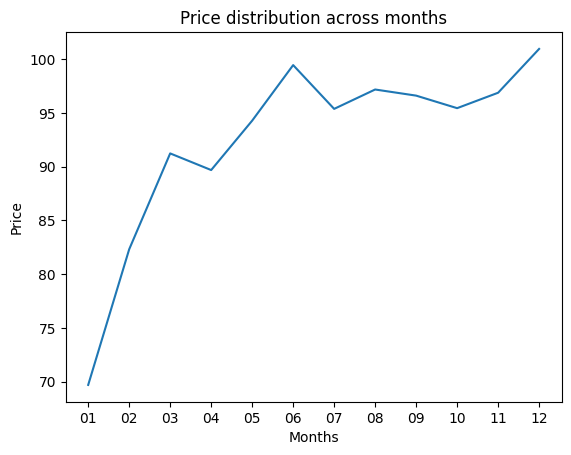

In [114]:
sns.lineplot(data = result, x = 'month', y = 'price')
plt.title("Price distribution across months")
plt.xlabel("Months")
plt.ylabel("Price")


The graph shows the average price distribution over the year. It can be concluded that the hosts have dynamic pricing capability, rising around the summer-holidays and changing.

In [115]:
#Review counts trend over the year
query = "select count(reviewer_id) as count, strftime('%m',date) as month from reviews group by month"
result = pd.read_sql(query, database_airbnb)
result

,count,month
0,2867,01
1,2643,02
2,4158,03
3,4233,04
4,5854,05
5,8544,06
6,10503,07
7,13018,08
8,11677,09
9,8955,10


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

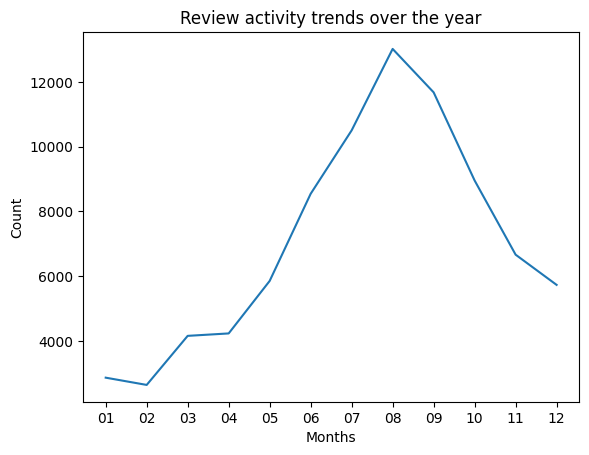

In [116]:
sns.lineplot(data = result, x = 'month', y = 'count')
plt.title("Review activity trends over the year")
plt.xlabel("Months")
plt.ylabel("Count")


The above graph shows the average reviews counts over the months which piques around July/August and reduces.

In [118]:
#Listings across neighbourhoods
query = "select count(l.id) as count, n.neighbourhood from listings l left join \
neighbourhood n on l.neighbourhood_id = n.neighbourhood_id group by n.neighbourhood \
order by  count desc limit 10"
result = pd.read_sql(query, database_airbnb)
result

,count,neighbourhood
0,397,Broadway
1,234,Belltown
2,167,Wallingford
3,158,Fremont
4,135,Minor
5,122,University District
6,119,Stevens
7,108,First Hill
8,103,Central Business District
9,94,Lower Queen Anne


Text(0, 0.5, 'Count')

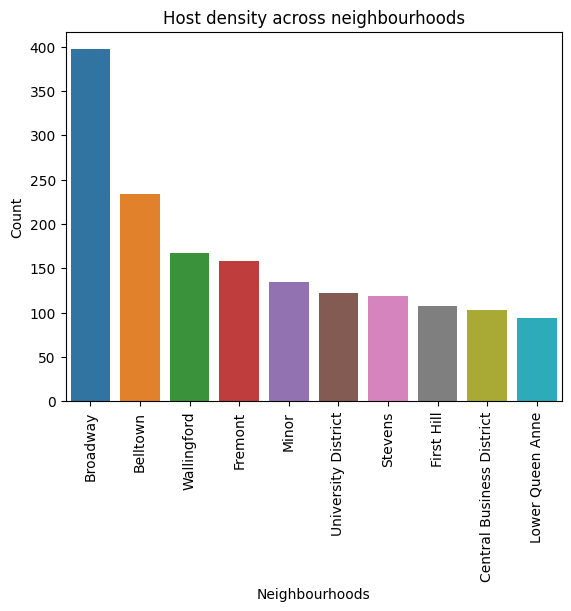

In [119]:
sns.barplot(result, x = 'neighbourhood',y = 'count')
plt.xticks(rotation = 90)
plt.title("Host density across neighbourhoods")
plt.xlabel("Neighbourhoods")
plt.ylabel("Count")


Broadway is dominating with the most number of listings followed by other neighbourhoods which has almost less than half the number of listings. 

In [120]:
#Price variation over public transit bus proximity
query = "with s1 as \
(select price, id, case \
when transit like '%bus%' or transit like '%Bus%' or transit like '%train%' or transit like '%Train%' then 'Yes'  \
else 'No' \
end \
as proximity from listings) \
select avg(price), proximity from s1 group by proximity"
result = pd.read_sql(query, database_airbnb)
result

,avg(price),proximity
0,136.684564,No
1,123.261607,Yes


Here, on checking the transit column for "Bus" or "Train indicating listings that have closer proximity to public transport have a price difference. It can be seen that proximity does not necessarily mean higher prices.

In [121]:
#Occupancy rate column
result = calendar.groupby(['occupancy_rate'])['listing_id'].count().reset_index().sort_values(ascending=False, by='listing_id')
result = result[(result.occupancy_rate != 0)]
result

,occupancy_rate,listing_id
362,100.000000,34675
273,75.616438,19320
360,99.452055,11616
274,75.890411,5817
183,50.958904,5766
...,...,...
1,0.273973,91
2,0.547945,88
84,23.013699,84
68,18.630137,68


<Axes: xlabel='occupancy_rate', ylabel='listing_id'>

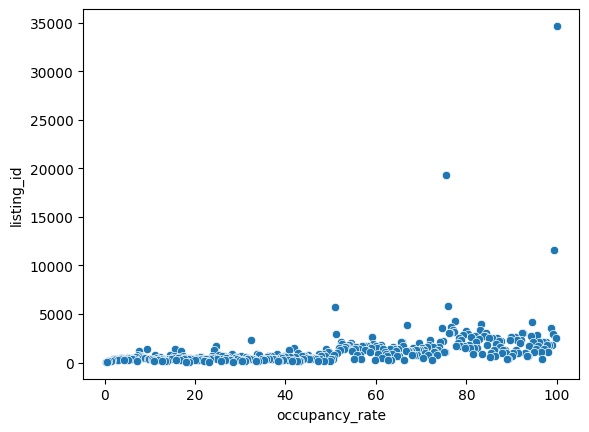

In [122]:
sns.scatterplot(data = result, x = 'occupancy_rate', y= 'listing_id')

After grouping the occupancy rate by listing and plotting we can see that most of the listings have more than 40% occupancy rate.

In [123]:
#Identifying superhosts as those who have more than 10 listings
result = listings['super_host'].value_counts().reset_index()
result

,super_host,count
0,No,2758
1,Yes,1060


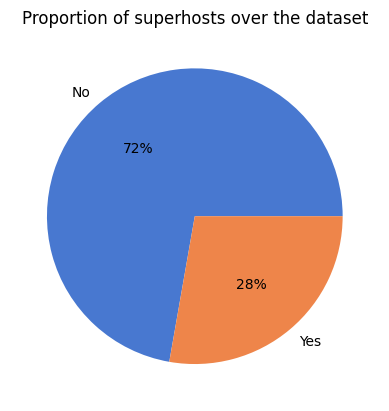

In [124]:
colors = sns.color_palette('muted')
plt.pie(result['count'], labels = result["super_host"], colors = colors, autopct='%.0f%%')
plt.title("Proportion of superhosts over the dataset")
plt.show()


If the host has more than 10 listings, they are deemed as superhost. We can see that 28% of the hosts can be deemed as superhosts.

In [125]:
#Revenue generated
calendar_df['revenue']= calendar_df.groupby('listing_id')['price'].transform('mean')
revenue_data =  calendar_df[calendar_df.available=="f"].groupby(['listing_id'])['revenue'].agg(['sum'])
revenue_data = pd.merge(revenue_data, listings, left_on='listing_id', right_on = 'id', how='left')
revenue_data.head(5)

,sum,id,last_scraped,transit,name,location,property_type,room_type,bedrooms,bathrooms,beds,square_feet,price,weekly_price,monthly_price,minimum_nights,maximum_nights,neighbourhood,host_country,super_host
0,5688.986301,3335,2016-01-04,"Light rail is walking distance, bus lines are ...",Jessica,"Seattle, Washington, United States",NaN,Entire home/apt,2.0,1.0,2.0,750.0,120.0,550.000000,1600.00000,2,730,Dunlap,UnitedStates,Yes
1,2557.435616,5682,2016-01-04,Bus 120 is right outside and goes into downtow...,Maddy,"Seattle, Washington, United States",Apartment,Entire home/apt,1.0,1.0,1.0,750.0,48.0,375.000000,1250.00000,3,28,South Delridge,UnitedStates,No
2,3850.849315,7369,2016-01-04,bus stop in front of building and around the c...,Shireen,"Seattle, Washington, United States",Condominium,Entire home/apt,1.0,1.0,1.0,800.0,85.0,788.481832,2613.33619,1,1125,Broadway,UnitedStates,No
3,5470.586301,9460,2016-01-04,On a map it looks like the building is right n...,Siena,"Seattle, Washington, United States",Bed & Breakfast,Private room,1.0,1.0,1.0,750.0,99.0,788.481832,2613.33619,3,29,First Hill,UnitedStates,No
4,15463.972603,9531,2016-01-04,The Metro bus transit center and downtown wate...,Cassie,"Seattle, Washington, United States",House,Entire home/apt,2.0,1.0,5.0,1200.0,165.0,1075.000000,3000.00000,3,365,Fairmount Park,UnitedStates,No


<function matplotlib.pyplot.show(close=None, block=None)>

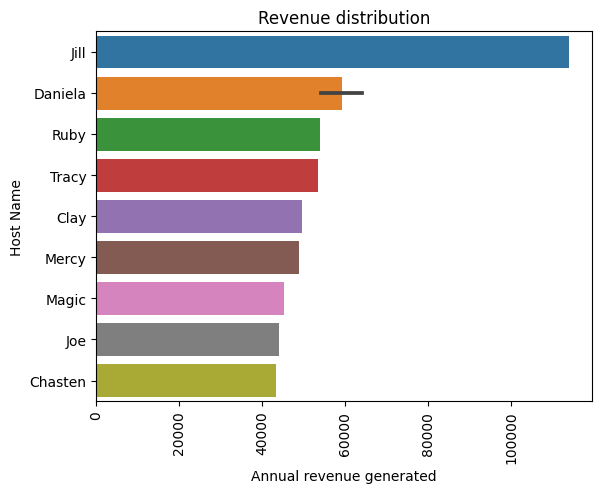

In [126]:
top10_revenue = revenue_data.sort_values(ascending=False, by='sum').head(10)
sns.barplot(data = top10_revenue, x = 'sum', y = 'name')
plt.xticks(rotation = 90)
plt.title("Revenue distribution")
plt.xlabel("Annual revenue generated")
plt.ylabel("Host Name")
plt.show

We can see from this graph for most hosts the annual revenue varied between \\$40000 and 
\\$60000 except for Jill crossing over \\$100000

# Conclusion #

1. Premium pricing neighborhoods identified. 
2. Most reviewed hosts noted - possibly holding many listings. 
3. Occupancy spikes in holiday months - July/August. 
4. Entire homes priced ~2x higher than private rooms and ~3x of shared rooms. 
5. Reviews do not always equal higher prices.

Demonstrated end-to-end ETL pipeline.
Designed SQL schema & performed analytical queries.
Produced visual insights for business decisions.


